In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [42]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats 

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func

In [44]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
inspector.get_table_names()
columns = inspector.get_columns('measurement')
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [50]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [51]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Prev Year: ", prev_year)
# Perform a query to retrieve the data and precipitation scores
perc_scores = session.query(measurement.date, measurement.prcp).\
                filter(measurement.date >= '2016-08-23').all()
perc_scores


Prev Year:  2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [53]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
perc_scores = pd.DataFrame(perc_scores)
perc_scores = perc_scores.set_index("date")
perc_scores.head()


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [54]:
# Sort the dataframe by date
perc_scores_sorted = perc_scores.sort_values(by = "date")
perc_scores_sorted.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<function matplotlib.pyplot.show(close=None, block=None)>

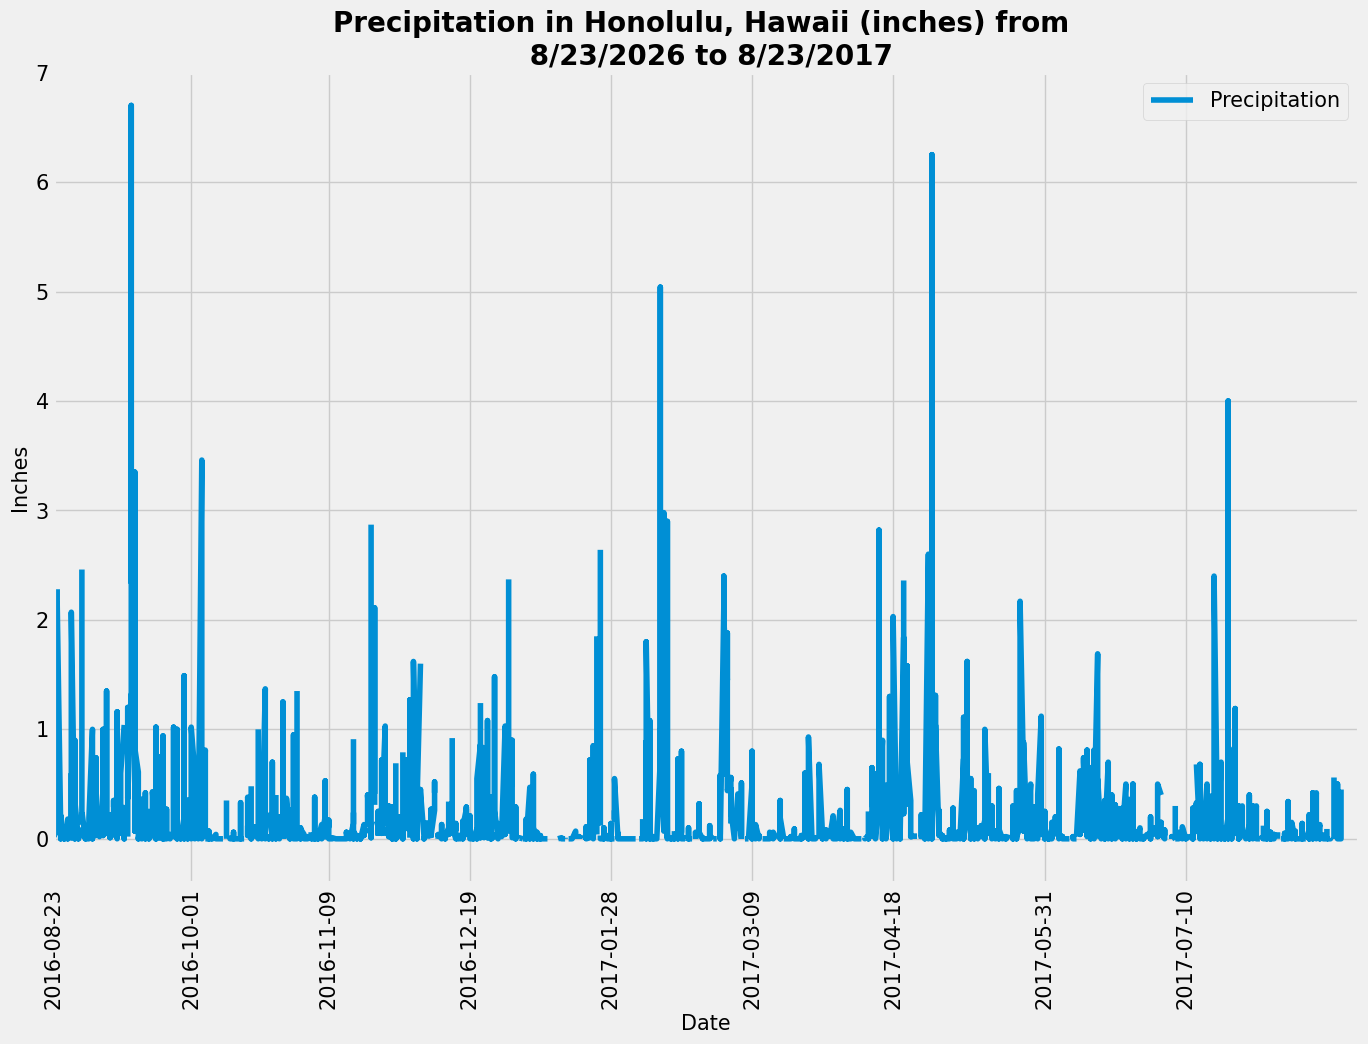

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,10))
plt.plot(perc_scores_sorted.index, perc_scores_sorted['prcp'])
plt.legend(['Precipitation'], loc='upper right', fontsize=15)
xlocation = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 
plt.xticks(xlocation, rotation='vertical', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.title(f"Precipitation in Honolulu, Hawaii (inches) from \n 8/23/2026 to 8/23/2017", fontsize=20, fontweight='bold')
plt.yticks(size=15)
plt.xlim(0,370)
plt.ylim(-0.4,7)
plt.savefig("percip_plot.png", bbox_inches = 'tight')
plt.show

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
perc_scores_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
columns = inspector.get_columns('station')
session.query(station.id).count()



9

In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = [station.station, func.count(measurement.station)]
session.query(*active_stations).filter(station.station == measurement.station).group_by(station.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
session.query(*station_id).filter(measurement.station == active_stations[0]).all()

[(53.0, 87.0, 73.09795396419437)]

In [69]:
# Using the most active station id
session.query(measurement.station, func.count(measurement.tobs)).\
    group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).first()

('USC00519281', 2772)

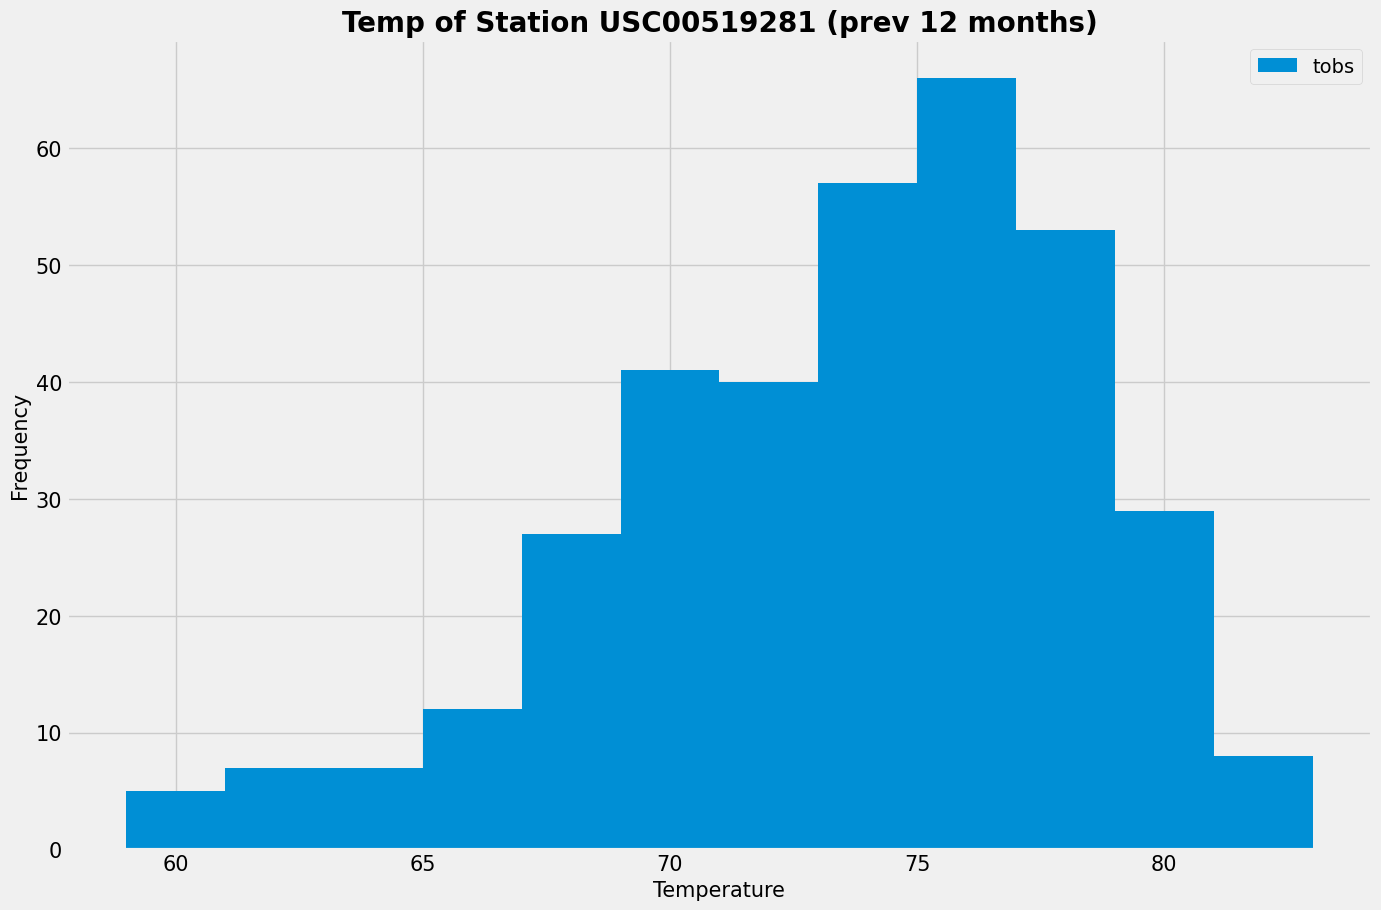

<Figure size 640x480 with 0 Axes>

In [73]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id_num = 'USC00519281'
histo_input = session.query(measurement.tobs).\
    filter(measurement.date.between('2016-08-23', '2017-08-24'),\
           measurement.station == station_id_num).all()

plt.figure(figsize=(15,10))
plt.hist(np.ravel(histo_input), bins=12)
plt.title('Temp of Station USC00519281 (prev 12 months)', fontsize=20, fontweight='bold')
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['tobs'], loc='upper right')
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('station_plot.png')
plt.show()
plt.tight_layout()

# Close Session

In [74]:
# Close Session
session.close()